<a href="https://colab.research.google.com/github/Ibilis37/DeepLearning/blob/main/lab3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Создание нейронной сети, выполняющей предсказание непрерывной величины

In [ ]:
%%capture
!wget https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
import pandas as pd
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
training_data.head()
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


Ниже в таблице представлено описание каждого из 12 полей.

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**price**       |Цена                                            |**transmission**|Коробка передач                           |
|**year**        |Год производства 	                              |**drive**       |Привод                                    |
|**condition**   |Состояние        	                              |**size**        |Полноразмер или нет                       |
|**cylinders**   |Количество цлиндров 	                          |**lat**         |Широта 	                                  |
|**odometer**    |Пробег                                          |**long**        |Долгота  	                              |
|**title_status**|Легальный статус авто  (все документы в наличии)|**weather**     |Среднегодовая температура в городе продажи|


In [ ]:
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


Проверим данные на наличие пропусков и типов переменных

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно вызвать у переменной *training_data* метод **info()**.

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


Анализируем результата выполнения команды:

* 4913 строк (entries)
* 12 столбцов (Data columns)

В данных присутствует три типа dtypes:
* int64 - целое число  (5 столбцов)
* float64 - дробное число (3 столбца)
* object - не число, обычно текст (4 столбца)

В нашем случае признаки с типом object имеют текстовые значения.

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (4913).

Для удобства работы выкинем NaN данные из нашего датасета, применив метод **dropna()** к *training_data*:

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2104 non-null   int64  
 1   year          2104 non-null   int64  
 2   condition     2104 non-null   int64  
 3   cylinders     2104 non-null   int64  
 4   odometer      2104 non-null   int64  
 5   title_status  2104 non-null   object 
 6   transmission  2104 non-null   object 
 7   drive         1975 non-null   object 
 8   size          1628 non-null   object 
 9   lat           2104 non-null   float64
 10  long          2104 non-null   float64
 11  weather       2036 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 197.4+ KB


In [ ]:
training_data = training_data.dropna()

Анализируем результата выполнения команды:

* 2104 строк (entries)
* 12 столбцов (Data columns)

В данных присутствует три типа dtypes:

* int64 - целое число (5 столбцов)
* float64 - дробное число (3 столбца)
* object - не число, обычно текст (4 столбца)

В нашем случае признаки с типом object имеют текстовые значения.

Цифры в каждой строчке обозначают количество заполненных (non-null) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (2104).

Для удобства работы выкинем NaN данные из нашего датасета, применив метод dropna() к test_data:

In [ ]:
test_data = test_data.dropna()

С помощью метода **_get_numeric_data()** оставим столбцы, содержащие только числовые данные.

In [ ]:
training_data = training_data._get_numeric_data()
test_data = test_data._get_numeric_data()

In [ ]:
training_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


In [ ]:
test_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,5990,2004,4,8,210445,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,32.832296,-97.169012,67.0


In [ ]:
target_variable_name = 'price'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

In [ ]:
training_points.head()

,year,condition,cylinders,odometer,lat,long,weather
0,2016,4,6,43500,36.471500,-82.483400,59.0
1,2009,2,8,98131,40.468826,-74.281734,52.0
2,2002,2,8,201803,42.477134,-82.949564,45.0
3,2000,1,8,170305,40.764373,-82.349503,49.0
5,2003,3,8,167662,45.518031,-122.578752,50.0


Таким образом мы разделили целевую переменную и входные признаки в различные **dataframe**. Аналогичным образом необходимо провести обработку тестовых данных.

В качестве примера создания использовать [пример с лекции](https://colab.research.google.com/drive/1FTaM9W8J88lfygvEDAM1Lk7_9iUhfA2f?usp=sharing).

**Задание (базовый уровень):**
Создать нейронную сеть, которая будет предсказывать цену автомобиля на основе числовых полей исходного датасета (оценку качества регрессора проводить на основе метрик MAE, MSE).

**Задание (повышенный уровень):**
Создать нейронную сеть, которая будет предсказывать цену автомобиля на основе всех полей исходного датасета (оценку качества регрессора проводить на основе метрик MAE, MSE). Для кодирования текстовых полей можно воспользоваться **LabelEncoder** либо **OneHotEncoder** из библиотеки **sklearn.preprocessing**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Перед началом изучения набора данных выведем тепловую карту, основанную на матрице корреляции. Данный шаг позволит нам определить наиболее значимые переменные для построения модели.

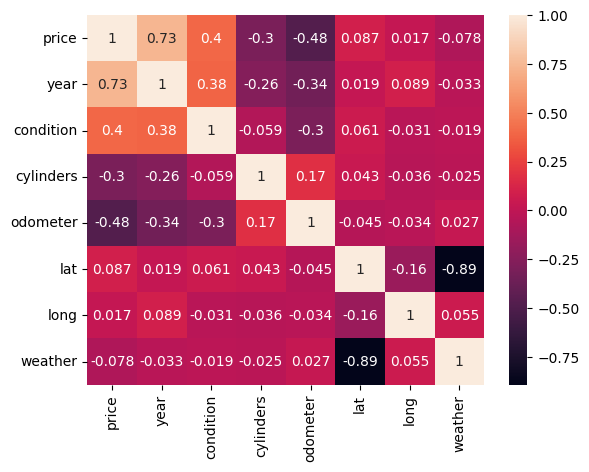

In [ ]:
cols = ['price','year', 'condition', 'cylinders', 'odometer', 'lat', 'long', 'weather']
hm = sns.heatmap(training_data[cols].corr(),
                 cbar=True,
                 annot=True)

Целевой переменной, значение которой мы хотим научиться предсказывать, нашего набора данных является **price**. Наибольшее абсолютное значение корреляции у нее наблюдается с переменной **year**.

Обозначим _year_ как входной параметр, а _price_ как выходной.

In [ ]:
X = training_data[['year']].values
y = training_data['price'].values

Импортируем бибилиотеку содержащую модель линейной регрессии.

Создадим и обучим нашу модель на сформированном наборе данных.

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)
y_pred = linReg.predict(X) # содержит предсказанные значения целевой переменной, основанные на линейной модели, обученной на данных X и y

Для того чтобы определить, насколько наша модель линейной регрессии хорошо справляется со своей задачей, воспользуемся графическим представлением.

Точками синего цвета представлены наши реальные данные, линией красного - полученная регрессионная модель.

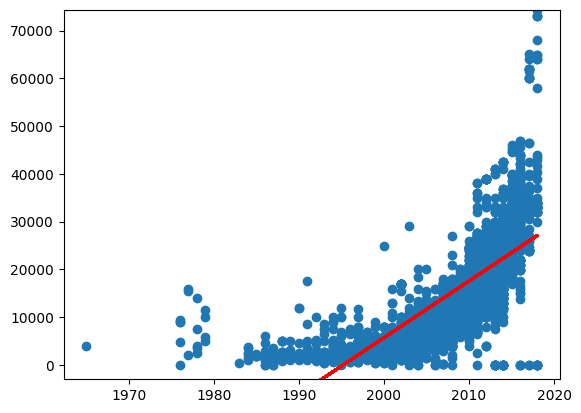

In [ ]:
import matplotlib.pyplot as plt

# Определение максимального значения y
max_y = max(y)

# Установка пределов значений по оси y от 0 до максимального значения y
plt.ylim(-3000, max_y)

# Построение графика
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2)
plt.show()

Визуальный анализ показывает, что точки реальных данных действительно сконцентрированы вокруг линии нашего предсказания, но такой анализ не является достаточным для полноценного исследования, поэтому мы доложны разобрать основные метрики определения качества регрессионной модели.

Но перед этим давайте построим регрессионную модель с использованием другого входного столбца или их комбинации.

In [ ]:
X = training_data[['odometer']].values
y = training_data['price'].values

Для построения альтернативной модели воспользуемся столбцом, котороый обладает вторым по размеру коэффициентом корреляции (odometer).

In [ ]:
linReg = LinearRegression()
linReg.fit(X, y)
y_pred = linReg.predict(X)

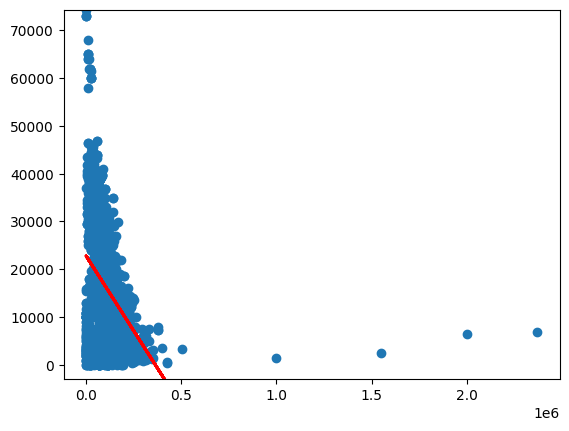

In [ ]:
# Определение максимального значения y
max_y = max(y)

# Установка пределов значений по оси y от 0 до максимального значения y
plt.ylim(-3000, max_y)

# Построение графика
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2)
plt.show()

По графикам видно, что первая модель оказалась лучше. Проведем для нее оценку качества регрессора на основе метрик MAE, MSE

In [ ]:
X_train = training_data[['year']].values
y_train = training_data['price'].values
X_test = test_data[['year']].values
y_test = test_data['price'].values
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 5301.264, test: 5135.723
MSE train: 53906754.966, test: 50750408.305
R^2 train: 0.539, test: 0.567


1. Далее разделяем данные на признаки (X) и целевую переменную (y) \
2. Масштабируем признаки, создаем модели нейронной сети с разным кол-вом скрытых слоев
3. Компилируем модель с оптимизатором Adam или RMSprop и функцией потерь среднеквадратичной ошибки
4. Обучаем модель на обучающих данных
5. Делаем предсказания на тестовых данных и оцениваем качество модели с использованием метрик MAE и MSE.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Подготовка данных
X_train = training_data.drop('price', axis=1)
y_train = training_data['price']
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели нейронной сети
model = Sequential([
    Dense(13, kernel_initializer='uniform',activation = "sigmoid"), #  первый скрытый слой с 13 нейронами, использующий сигмоидную функцию активации.
    # Параметр kernel_initializer='uniform' указывает на использование равномерного распределения для инициализации весов.
    Dense(20, kernel_initializer='uniform',activation = "sigmoid"), # второй скрытый слой с 20 нейронами и сигмоидной функцией активации.
    Dense(1, activation = 'linear') # выходной слой с одним нейроном и линейной функцией активации, что означает, что модель предсказывает непрерывную величину.
    ])

# Компиляция модели
model.compile(optimizer='adam', # оптимизатор
              loss='mean_squared_error') # ф-ия потерь

# Обучение модели
model.fit(X_train_scaled,  # обучающие признаки
          y_train, # обучающие метки
          epochs=10, #  количество эпох обучения
          batch_size=32, #  размер пакета (сколько образцов данных будет обрабатываться за один раз перед обновлением весов)
          verbose=2) # выводится индикатор прогресса на каждую эпоху)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Epoch 1/10
115/115 - 1s - loss: 354301984.0000 - 1s/epoch - 9ms/step
Epoch 2/10
115/115 - 0s - loss: 354211424.0000 - 218ms/epoch - 2ms/step
Epoch 3/10
115/115 - 0s - loss: 354120800.0000 - 202ms/epoch - 2ms/step
Epoch 4/10
115/115 - 0s - loss: 354036896.0000 - 281ms/epoch - 2ms/step
Epoch 5/10
115/115 - 0s - loss: 353959296.0000 - 238ms/epoch - 2ms/step
Epoch 6/10
115/115 - 0s - loss: 353885184.0000 - 281ms/epoch - 2ms/step
Epoch 7/10
115/115 - 0s - loss: 353807072.0000 - 338ms/epoch - 3ms/step
Epoch 8/10
115/115 - 0s - loss: 353728928.0000 - 317ms/epoch - 3ms/step
Epoch 9/10
115/115 - 0s - loss: 353654624.0000 - 259ms/epoch - 2ms/step
Epoch 10/10
115/115 - 0s - loss: 353581440.0000 - 292ms/epoch - 3ms/step
49/49 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 15316.052419154426
Mean Squared Error (MSE): 351867407.12232286


In [ ]:
# Создание модели нейронной сети
model = Sequential([
    Dense(13, kernel_initializer='uniform',activation = "selu"),
    Dense(20, kernel_initializer='uniform',activation = "selu"),
    Dense(1, activation = 'linear')
    ])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train_scaled,
          y_train,
          epochs=10,
          batch_size=32,
          verbose=2)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Epoch 1/10
115/115 - 2s - loss: 354281248.0000 - 2s/epoch - 13ms/step
Epoch 2/10
115/115 - 0s - loss: 353812768.0000 - 410ms/epoch - 4ms/step
Epoch 3/10
115/115 - 0s - loss: 352791424.0000 - 358ms/epoch - 3ms/step
Epoch 4/10
115/115 - 0s - loss: 350843776.0000 - 316ms/epoch - 3ms/step
Epoch 5/10
115/115 - 0s - loss: 347704608.0000 - 323ms/epoch - 3ms/step
Epoch 6/10
115/115 - 0s - loss: 343264992.0000 - 344ms/epoch - 3ms/step
Epoch 7/10
115/115 - 0s - loss: 337404160.0000 - 295ms/epoch - 3ms/step
Epoch 8/10
115/115 - 0s - loss: 330085728.0000 - 277ms/epoch - 2ms/step
Epoch 9/10
115/115 - 0s - loss: 321265824.0000 - 244ms/epoch - 2ms/step
Epoch 10/10
115/115 - 0s - loss: 310987040.0000 - 251ms/epoch - 2ms/step
49/49 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 14217.262033027715
Mean Squared Error (MSE): 302629206.88722944


In [ ]:
# Создание модели нейронной сети
model = Sequential([
    Dense(15, kernel_initializer='uniform',activation = "softmax"),
    Dense(15, kernel_initializer='uniform',activation = "selu"),
    Dense(20, kernel_initializer='uniform',activation = "selu"),
    Dense(1, activation = 'linear')
    ])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ["mean_absolute_error"])

# Обучение модели
model.fit(X_train_scaled,
          y_train,
          epochs=10,
          batch_size=32,
          verbose=2)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Epoch 1/10
115/115 - 1s - loss: 354270240.0000 - mean_absolute_error: 15405.2451 - 1s/epoch - 11ms/step
Epoch 2/10
115/115 - 0s - loss: 353594208.0000 - mean_absolute_error: 15383.8252 - 216ms/epoch - 2ms/step
Epoch 3/10
115/115 - 0s - loss: 351981312.0000 - mean_absolute_error: 15333.2686 - 234ms/epoch - 2ms/step
Epoch 4/10
115/115 - 0s - loss: 348872928.0000 - mean_absolute_error: 15235.7725 - 199ms/epoch - 2ms/step
Epoch 5/10
115/115 - 0s - loss: 343876896.0000 - mean_absolute_error: 15077.9580 - 206ms/epoch - 2ms/step
Epoch 6/10
115/115 - 0s - loss: 336801248.0000 - mean_absolute_error: 14848.2158 - 211ms/epoch - 2ms/step
Epoch 7/10
115/115 - 0s - loss: 327499104.0000 - mean_absolute_error: 14544.2168 - 222ms/epoch - 2ms/step
Epoch 8/10
115/115 - 0s - loss: 315914432.0000 - mean_absolute_error: 14165.9580 - 206ms/epoch - 2ms/step
Epoch 9/10
115/115 - 0s - loss: 302231680.0000 - mean_absolute_error: 13709.8193 - 196ms/epoch - 2ms/step
Epoch 10/10
115/115 - 0s - loss: 286888960.0000 

In [ ]:
# Создание модели нейронной сети
model = Sequential([
    Dense(20, kernel_initializer='uniform',activation = "softmax"),
    Dense(15, kernel_initializer='uniform',activation = "selu"),
    Dense(19, kernel_initializer='uniform',activation = "selu"),
    Dense(16, kernel_initializer='uniform',activation = "selu"),
    Dense(10, kernel_initializer='uniform',activation = "selu"),
    Dense(1, activation = 'linear')
    ])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ["mean_absolute_error"])

# Обучение модели
model.fit(X_train_scaled,
          y_train,
          epochs=20,
          batch_size=32,
          verbose=2)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Epoch 1/20
115/115 - 2s - loss: 354056384.0000 - mean_absolute_error: 15398.5068 - 2s/epoch - 16ms/step
Epoch 2/20
115/115 - 0s - loss: 347029504.0000 - mean_absolute_error: 15174.2100 - 297ms/epoch - 3ms/step
Epoch 3/20
115/115 - 0s - loss: 299228736.0000 - mean_absolute_error: 13625.5352 - 231ms/epoch - 2ms/step
Epoch 4/20
115/115 - 0s - loss: 180760032.0000 - mean_absolute_error: 9943.7158 - 244ms/epoch - 2ms/step
Epoch 5/20
115/115 - 0s - loss: 104848664.0000 - mean_absolute_error: 7994.9468 - 303ms/epoch - 3ms/step
Epoch 6/20
115/115 - 1s - loss: 83477048.0000 - mean_absolute_error: 7110.1318 - 527ms/epoch - 5ms/step
Epoch 7/20
115/115 - 1s - loss: 64280820.0000 - mean_absolute_error: 6005.1934 - 512ms/epoch - 4ms/step
Epoch 8/20
115/115 - 1s - loss: 45883200.0000 - mean_absolute_error: 4653.8716 - 545ms/epoch - 5ms/step
Epoch 9/20
115/115 - 1s - loss: 38350412.0000 - mean_absolute_error: 4101.1938 - 556ms/epoch - 5ms/step
Epoch 10/20
115/115 - 0s - loss: 34549616.0000 - mean_abso